In [29]:
import sys
sys.path.append("../src/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import config


In [30]:
df = pd.read_excel(config.TRAINING_FILE, na_values='nan')
df.drop('CIF', axis=1, inplace=True)
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [32]:

new_cols_name = {
    'CUS_DOB' : "cus_dob",
    'AGE' : "age",
    'CUS_Month_Income' : "cus_month_income",
    'CUS_Gender' : "cus_gender",
    'CUS_Marital_Status' : "cus_marital_status",
    'CUS_Customer_Since' : "cus_customer_since",
    'YEARS_WITH_US' : "years_with_us",
    '# total debit transactions for S1':"total_debit_trans_s1",
    '# total debit transactions for S2':"total_debit_trans_s2",
    '# total debit transactions for S3':"total_debit_trans_s3", 
    'total debit amount for S1':"total_debit_amt_s1",
    'total debit amount for S2': "total_debit_amt_s2", 
    'total debit amount for S3' : "total_debit_amt_s3",
    '# total credit transactions for S1' : "total_credit_trans_s1",
    '# total credit transactions for S2': "total_credit_trans_s2",
    '# total credit transactions for S3': "total_credit_trans_s3", 
    'total credit amount for S1' : "total_credit_amt_s1",
    'total credit amount for S2':"total_credit_amt_s2",
    'total credit amount for S3':"total_credit_amt_s3",
    'total debit amount': "total_debit_amt", 
    'total debit transactions': "total_debit_trans", 
    'total credit amount': "total_credit_amt",
    'total credit transactions' : "total_credit_trans", 
    'total transactions': "total_transactions", 
    'CUS_Target' : "cus_target",
    'TAR_Desc' : "tar_desc",
    'Status' : "status"
}

df.rename(columns=new_cols_name, inplace=True)

In [33]:
df.columns

Index(['cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       'total_debit_trans_s1', 'total_debit_trans_s2', 'total_debit_trans_s3',
       'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
       'total_credit_trans_s1', 'total_credit_trans_s2',
       'total_credit_trans_s3', 'total_credit_amt_s1', 'total_credit_amt_s2',
       'total_credit_amt_s3', 'total_debit_amt', 'total_debit_trans',
       'total_credit_amt', 'total_credit_trans', 'total_transactions',
       'cus_target', 'tar_desc', 'status'],
      dtype='object')

In [34]:
df.isnull().sum()

cus_dob                   0
age                       0
cus_month_income         11
cus_gender                2
cus_marital_status        0
cus_customer_since        0
years_with_us             0
total_debit_trans_s1      0
total_debit_trans_s2      0
total_debit_trans_s3      0
total_debit_amt_s1        0
total_debit_amt_s2        0
total_debit_amt_s3        0
total_credit_trans_s1     0
total_credit_trans_s2     0
total_credit_trans_s3     0
total_credit_amt_s1       0
total_credit_amt_s2       0
total_credit_amt_s3       0
total_debit_amt           0
total_debit_trans         0
total_credit_amt          0
total_credit_trans        0
total_transactions        0
cus_target                0
tar_desc                  0
status                    0
dtype: int64

In [35]:
# Extracting all the null values in the cus_month_income features
df[df.cus_month_income.isnull()]

,cus_dob,age,cus_month_income,cus_gender,cus_marital_status,cus_customer_since,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,...,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
85,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,9,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,22,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,1,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,0,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,23,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,0,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,2,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,47,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,9,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Identify optimal number of clusters (e.g., using the elbow method)
# In this example, let's assume we choose 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

# Assign cluster labels to missing values
missing_data = df[df['cus_month_income'].isnull()]
missing_data_for_clustering = missing_data[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]
scaled_missing_data = scaler.transform(missing_data_for_clustering)
missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)

# Fill missing values with cluster centroids
for cluster_label in missing_data['cluster_label'].unique():
    cluster_centroid = kmeans.cluster_centers_[cluster_label]
    missing_data.loc[missing_data['cluster_label'] == cluster_label, 'cus_month_income'] = cluster_centroid[0]  # Assuming 'age' is the first feature

# Update the original dataframe with filled missing values
df.update(missing_data)


C:\Users\User\AppData\Local\Temp\ipykernel_12624\1904402163.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)


In [37]:
df.cus_month_income

0          7116.64
1       1500000.00
2       5000000.00
3           500.00
4       9000000.00
           ...    
1244       4500.00
1245    3500000.00
1246       1000.00
1247    2000000.00
1248    5000000.00
Name: cus_month_income, Length: 1249, dtype: float64

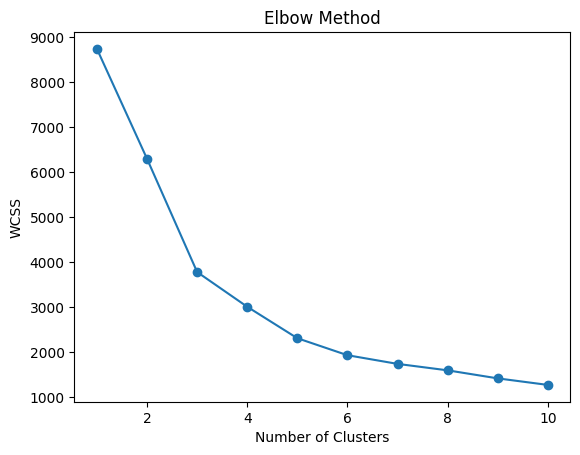

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [39]:
df.isnull().sum()

cus_dob                  0
age                      0
cus_month_income         0
cus_gender               2
cus_marital_status       0
cus_customer_since       0
years_with_us            0
total_debit_trans_s1     0
total_debit_trans_s2     0
total_debit_trans_s3     0
total_debit_amt_s1       0
total_debit_amt_s2       0
total_debit_amt_s3       0
total_credit_trans_s1    0
total_credit_trans_s2    0
total_credit_trans_s3    0
total_credit_amt_s1      0
total_credit_amt_s2      0
total_credit_amt_s3      0
total_debit_amt          0
total_debit_trans        0
total_credit_amt         0
total_credit_trans       0
total_transactions       0
cus_target               0
tar_desc                 0
status                   0
dtype: int64

In [40]:
df.dropna(axis=0, inplace=True)

In [42]:
df.to_csv('../data/Cleaned data/clean_data.csv', index=False)

## `Grid_search`

In [5]:
# import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def param_search(X_train, X_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None], # Add None as an option
    'bootstrap': [True]
    }


    # Initialize Random Forest classifier
    rf = RandomForestClassifier()

    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', refit='roc_auc', verbose=2, return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Extract CV results
    cv_results = grid_search.cv_results_ 
    return cv_results 


In [6]:
df = pd.read_csv('../data/Cleaned data/df_smote.csv')
X = df.drop('status', axis=1)
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search and plot CV results
grid_results = param_search(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

c:\Users\User\anaconda3\envs\bank_classification\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1280 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\envs\bank_classification\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\envs\bank_classification\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\User\anaconda3\envs\bank_classification\Lib\site-packages\sklearn\base.py", line 666, in _v

In [9]:
test = pd.DataFrame(grid_results)

In [10]:
test.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

ValueError: x and y must have same first dimension, but have shapes (5,) and (1024,)

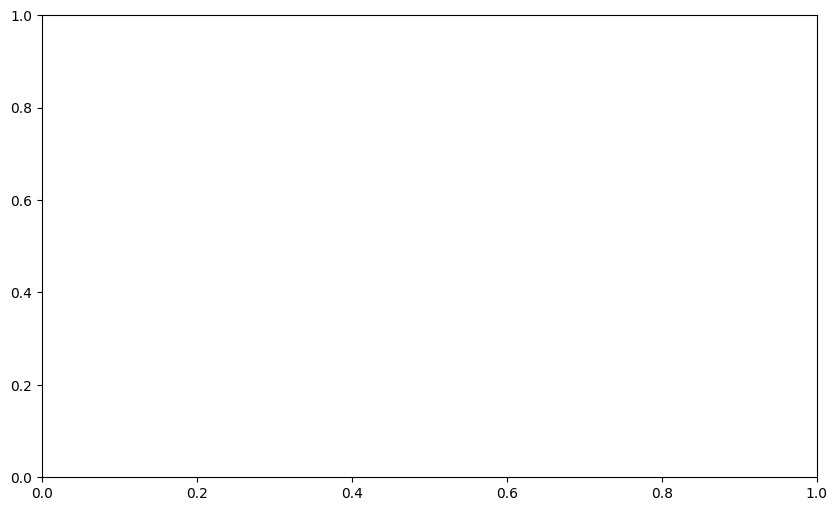

In [14]:
mean_train_scores = test['mean_train_score']
mean_test_scores = test['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
folds = range(5)  # Assuming you have 5 folds
plt.plot(folds, mean_train_scores, label='Mean Training Score', marker='o')
plt.plot(folds, mean_test_scores, label='Mean Testing Score', marker='o')

plt.xlabel('Fold')
plt.ylabel('Mean Score')
plt.title('Mean Training and Testing Scores for Each Fold')
plt.legend()
plt.grid(True)
plt.show()